In [122]:
#Random Forest Regression Model.

In [123]:
# IMPORT REQUIRED LIBRARIES

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [125]:
# Data LOADING

In [126]:
datset_path = r"D:\DolFIn\datasetTransactionAPI.csv"

In [127]:
def getSampleData():
    return pd.read_csv(datset_path)
datsetRF = getSampleData()

In [128]:
#CHECK DATASET DETAILS

In [129]:
print(datasetRF.shape) # dimensions of dataset

(289, 16)


In [130]:
datasetRF.head(10)

,type,id,status,description,amount,account,balance,direction,class,institution,connection,enrich,transactionDate,postDate,subClass,links
0,transaction,4957bcf6-f18f-43d7-94df-71f44a0bcf32,posted,Wdl ATM WES IGA BALGOWLAH HGT BALGOWL AU,-200.0,d3de1ca1,22109.56,debit,cash-withdrawal,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,3/08/2023,2023-08-03T00:07:36,NaN,"{""account"":""https://au-api.basiq.io/users/6a52..."
1,transaction,0d6e11ab-e28e-4de0-a152-600cc44fb61c,posted,Non Hooli ATM Withdrawal Fee,-2.5,070c1d68-0ee0-477a-9679-294ea7059939,22309.56,debit,bank-fee,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,3/08/2023,2023-08-03T00:00:00Z,"{\title\"":\""\""","\""code\"":\""card\""}"""
2,transaction,323f6d42-a38e-4c46-83d2-6c8f3e999686,posted,Wdl ATM WES IGA BALGOWLAH HGT BALGOWL AU,-200.0,070c1d68-0ee0-477a-9679-294ea7059939,22312.06,debit,cash-withdrawal,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,3/08/2023,2023-08-03T00:00:00Z,NaN,"{\self\"":\""https://au-api.basiq.io/users/bca4b..."
3,transaction,1ab3a3c5-faeb-4de3-b5aa-612e5bc76fd5,posted,Non Hooli ATM Withdrawal Fee,-2.5,070c1d68-0ee0-477a-9679-294ea7059939,22512.06,debit,bank-fee,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,3/08/2023,2023-08-03T00:00:00Z,"{\title\"":\""\""","\""code\"":\""card\""}"""
4,transaction,d12df6a2-48b6-4f5f-a718-ccb377aa330c,posted,Transfer Platnm Homeloan 346454,-3852.5,070c1d68-0ee0-477a-9679-294ea7059939,22514.56,debit,payment,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,29/07/2023,2023-07-29T00:00:00Z,"{\title\"":\""Auxiliary Finance and Investment S...","\""code\"":\""641\""}"""
5,transaction,08e6f7c9-f359-48f2-b086-a55f468f2f60,posted,TFR From Transaction to CC Acc 13,-9406.0,070c1d68-0ee0-477a-9679-294ea7059939,26367.06,debit,payment,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,28/07/2023,2023-07-28T00:00:00Z,"{\title\"":\""Civic","Professional and Other Interest Group Services\"""
6,transaction,53570fde-c731-4e33-8224-0583650eeaa7,posted,Payroll WFRMS 15439393,17098.0,070c1d68-0ee0-477a-9679-294ea7059939,35773.06,credit,transfer,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,28/07/2023,2023-07-28T00:00:00Z,"{\title\"":\""Unknown\""","\""code\"":\""0\""}"""
7,transaction,55dbdd71-9976-43ec-a724-7cf620d279d4,posted,Manly Maths Tutor Wages,201.0,070c1d68-0ee0-477a-9679-294ea7059939,18675.06,credit,transfer,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,17/07/2023,2023-07-17T00:00:00Z,"{\title\"":\""Educational Support Services\""","\""code\"":\""822\""}"""
8,transaction,17b710a5-da3d-42f8-ae31-f9d601f95c6d,posted,MANLY WEST SCHOOL,-1422.2,070c1d68-0ee0-477a-9679-294ea7059939,18474.06,debit,payment,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,16/07/2023,2023-07-16T00:00:00Z,"{\title\"":\""School Education\""","\""code\"":\""802\""}"""
9,transaction,d93fb495-8a7a-4997-8a16-b3581b778471,posted,MANLY WEST SCHOOL,-51.0,070c1d68-0ee0-477a-9679-294ea7059939,19896.26,debit,payment,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,16/07/2023,2023-07-16T00:00:00Z,"{\title\"":\""School Education\""","\""code\"":\""802\""}"""


In [131]:
print(datasetRF.columns) #columns in dataset

Index(['type', 'id', 'status', 'description', 'amount', 'account', 'balance',
       'direction', 'class', 'institution', 'connection', 'enrich',
       'transactionDate', 'postDate', 'subClass', 'links'],
      dtype='object')


In [132]:
# DATA PREPROCESSING

In [133]:
# Drop unwanted columns from the dataset
clean = datasetRF.drop(['type', 'id', 'status', 'direction', 'connection', 'subClass', 'links', 'description', 'postDate', 'enrich', 'institution', 'account'], axis=1)

In [134]:
print(clean.columns) # print columns in dataset after cleaning

Index(['amount', 'balance', 'class', 'transactionDate'], dtype='object')


In [135]:
clean.head(10)

,amount,balance,class,transactionDate
0,-200.0,22109.56,cash-withdrawal,3/08/2023
1,-2.5,22309.56,bank-fee,3/08/2023
2,-200.0,22312.06,cash-withdrawal,3/08/2023
3,-2.5,22512.06,bank-fee,3/08/2023
4,-3852.5,22514.56,payment,29/07/2023
5,-9406.0,26367.06,payment,28/07/2023
6,17098.0,35773.06,transfer,28/07/2023
7,201.0,18675.06,transfer,17/07/2023
8,-1422.2,18474.06,payment,16/07/2023
9,-51.0,19896.26,payment,16/07/2023


In [136]:
# Convert dates to timestamp
datesAsTimestamp = pd.to_datetime(clean.pop('transactionDate'), format='%d/%m/%Y')
datesAsTimestamp = datesAsTimestamp.map(pd.Timestamp.timestamp)

In [137]:
# Extract day and year patterns from timestamp
day = 24*60*60
year = (365.2425)*day
clean['Day sin'] = np.sin(datesAsTimestamp * (2 * np.pi / day))
clean['Day cos'] = np.cos(datesAsTimestamp * (2 * np.pi / day))
clean['Year sin'] = np.sin(datesAsTimestamp * (2 * np.pi / year))
clean['Year cos'] = np.cos(datesAsTimestamp * (2 * np.pi / year))

In [138]:
# One hot encode the 'class' column
clean = clean.join(pd.get_dummies(clean.pop('class')))

In [139]:
# Split data into train and validation sets
train_fraction = 0.75
n = len(clean)
train_df = clean[:int(n*train_fraction)]
val_df = clean[int(n*train_fraction):]

In [140]:
# Split data into train and validation sets
train_fraction = 0.75
n = len(clean)
train_df = clean[:int(n*train_fraction)]
val_df = clean[int(n*train_fraction):]

In [141]:
# Prepare data for training
X_train = train_df.drop('amount', axis=1)
y_train = train_df['amount']
X_val = val_df.drop('amount', axis=1)
y_val = val_df['amount']

In [142]:
# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100)
rf_regressor.fit(X_train, y_train)

# Predict on validation set
y_pred = rf_regressor.predict(X_val)

In [143]:
# Calculate and print evaluation metrics
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100

In [144]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

Mean Squared Error: 13671836.94
Mean Absolute Error: 1525.93
Root Mean Squared Error: 3697.54
R-squared: 0.44
Mean Absolute Percentage Error: 379.58%


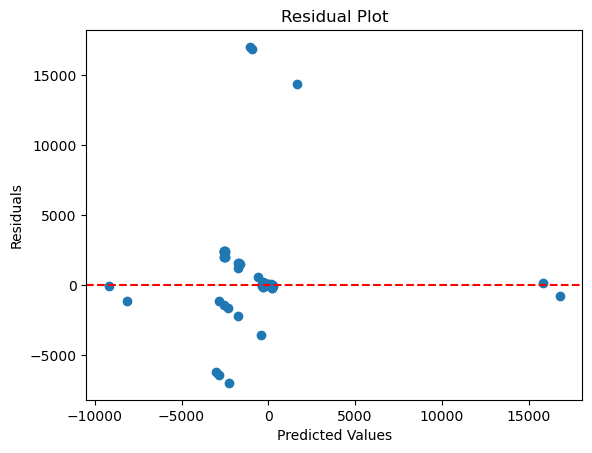

In [146]:
# Plot residuals
residuals = y_val - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()